In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
stock_data = pd.read_csv('GOOG.csv',parse_dates=['Date'])

In [3]:
type(stock_data.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-20,659.239990,668.880005,653.010010,663.020020,663.020020,5860900
1,2015-07-21,655.210022,673.000000,654.299988,662.299988,662.299988,3377200
2,2015-07-22,660.890015,678.640015,659.000000,662.099976,662.099976,3929300
3,2015-07-23,661.270020,663.630005,641.000000,644.280029,644.280029,3029100
4,2015-07-24,647.000000,648.169983,622.520020,623.559998,623.559998,3625700
...,...,...,...,...,...,...,...
1254,2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,1511.339966,1846400
1255,2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,1520.579956,1585000
1256,2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,1513.640015,1610700
1257,2020-07-16,1500.000000,1518.689941,1486.310059,1518.000000,1518.000000,1519300


In [5]:
training =  stock_data[stock_data['Date']<'2019-01-01'].copy()

In [6]:
training = training.drop(['Date','Adj Close'],axis=1)

In [7]:
testing = stock_data[stock_data['Date']>'2019-01-01'].copy()

In [8]:
testing = testing.drop(['Date','Adj Close'],axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scale = MinMaxScaler()
training_scale = scale.fit_transform(training)

In [11]:
x_train = []
y_train = []

for i in range(60,training_scale.shape[0]):
    x_train.append(training_scale[i-60:i])
    y_train.append(training_scale[i,0])

In [12]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [14]:
model = Sequential()
model.add(LSTM(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],5)))
model.add(LSTM(units=50,activation='tanh',return_sequences=True))
model.add(LSTM(units=50,activation='tanh',return_sequences=False))
model.add(Dense(units=1))



In [15]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
810/810 [==============================] - 18s 23ms/step - loss: 0.0364 - accuracy: 0.0012
Epoch 2/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0037 - accuracy: 0.0012
Epoch 3/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0021 - accuracy: 0.0012
Epoch 4/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0020 - accuracy: 0.0012
Epoch 5/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0021 - accuracy: 0.0012
Epoch 6/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0018 - accuracy: 0.0012
Epoch 7/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0017 - accuracy: 0.0012
Epoch 8/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0017 - accuracy: 0.0012
Epoch 9/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0018 - accuracy: 0.0012
Epoch 10/10
810/810 [==============================] - 9s 11ms/step - loss: 0.0016 - accur

In [17]:
past_60_days = training.tail(60)
testing = past_60_days.append(testing)

In [18]:
testing_scale = scale.transform(testing)

In [19]:
x_test = []
y_test = []

for i in range(60,testing.shape[0]):
    x_test.append(testing_scale[i-60:i])
    y_test.append(testing_scale[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)

In [20]:
y_pred = model.predict(x_test)

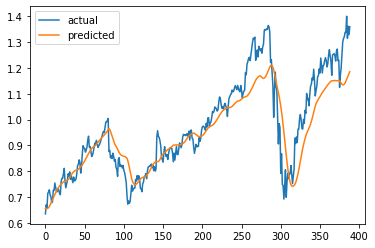

In [21]:
plt.plot(y_test,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()

In [22]:
sms_data = pd.read_csv('spam.csv')

In [23]:
sms_data

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [33]:
x = sms_data.text
y = sms_data.type

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [36]:
x_train.shape

(4737,)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = Pipeline([('TFDF',TfidfVectorizer()),('random',RandomForestClassifier())])
clf.fit(x_train,y_train)

C:\Users\ROHIT\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('TFDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [45]:
clf.predict(['Free entry in 2 a wkly comp to win FA Cup fina'])

array(['ham'], dtype=object)

In [46]:
clf.score(x_test,y_test)

0.978494623655914

In [48]:
clf.predict(['congratulation, you have won free ticket to USA this summer,call on 2444'])

array(['ham'], dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y_pred = clf.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[712,  18],
       [  0, 107]], dtype=int64)